In [41]:
from pathlib import Path
JSON_PATH = Path("/Users/joregan/Playing/hsi/annotations/final_resolved")

In [42]:
import json

speakers = {}

for file in JSON_PATH.glob("*.json"):
    parts = file.stem.split("_")
    speaker = parts[1]

    if not speaker in speakers:
        speakers[speaker] = []

    with open(file) as f:
        data = json.load(f)
    
    for seg in data:
        start = data[seg]["general"]["start"]
        end = data[seg]["general"]["end"]
        dur = end - start
        speakers[speaker].append(dur)


In [43]:
import numpy as np

longest = {k: np.max(speakers[k]) for k in speakers}
shortest = {k: np.min(speakers[k]) for k in speakers}
avg = {k: np.average(speakers[k]) for k in speakers}
totals = {k: np.sum(speakers[k]) for k in speakers}

median = {k: np.median(speakers[k]) for k in speakers}
std_dev = {k: np.std(speakers[k], ddof=1) for k in speakers}  # sample std dev
count = {k: len(speakers[k]) for k in speakers}
s_range = {k: longest[k] - shortest[k] for k in speakers}

In [46]:
import pandas as pd

summary_df = pd.DataFrame({
    'count': count,
    'mean': avg,
    'median': median,
    'std_dev': std_dev,
    'min': shortest,
    'max': longest,
    # 'range': s_range,
    # 'total_duration': totals
})

# Optional: clean formatting
summary_df = summary_df.round(2)

print(summary_df)

   count  mean  median  std_dev   min    max
4    902  2.59    1.89     2.24  0.16  16.60
7    759  4.71    3.26     5.02  0.16  67.23
6   1598  1.99    1.20     2.24  0.04  18.69
5    960  4.96    2.71     5.78  0.15  28.72
3    751  2.72    1.84     2.57  0.12  17.18


In [47]:
latex_table = summary_df.to_latex(
    index=True,        # Keeps the speaker names as row labels
    caption='Descriptive statistics of utterance durations by speaker',
    label='tab:speaker_stats',
    float_format="%.2f",
    column_format="lrrrrrrr",  # Adjust based on column count
    bold_rows=True
)

print(latex_table)


\begin{table}
\caption{Descriptive statistics of utterance durations by speaker}
\label{tab:speaker_stats}
\begin{tabular}{lrrrrrrr}
\toprule
 & count & mean & median & std_dev & min & max \\
\midrule
\textbf{4} & 902 & 2.59 & 1.89 & 2.24 & 0.16 & 16.60 \\
\textbf{7} & 759 & 4.71 & 3.26 & 5.02 & 0.16 & 67.23 \\
\textbf{6} & 1598 & 1.99 & 1.20 & 2.24 & 0.04 & 18.69 \\
\textbf{5} & 960 & 4.96 & 2.71 & 5.78 & 0.15 & 28.72 \\
\textbf{3} & 751 & 2.72 & 1.84 & 2.57 & 0.12 & 17.18 \\
\bottomrule
\end{tabular}
\end{table}



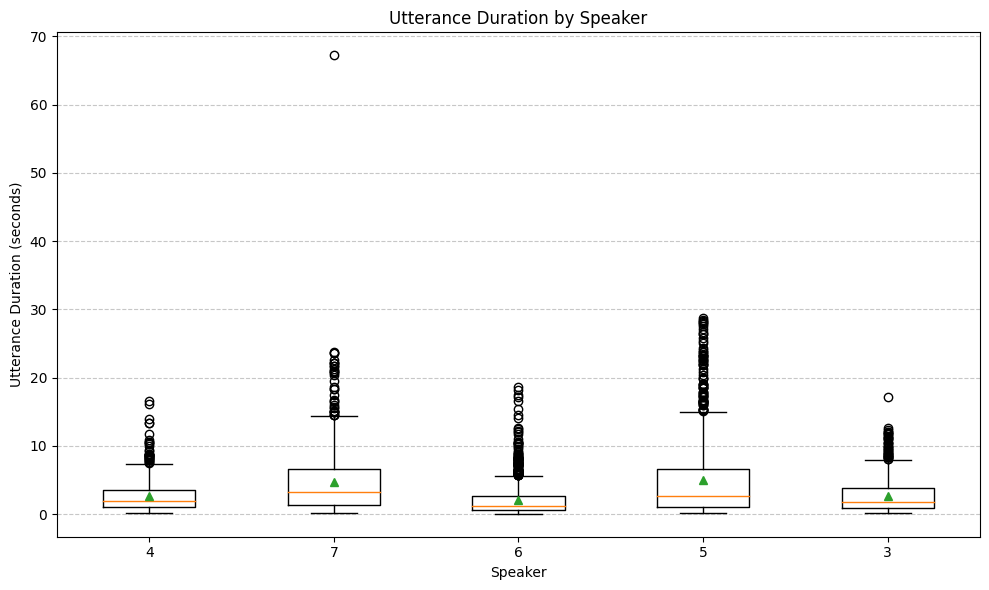

In [20]:
import matplotlib.pyplot as plt

# Reformat your dictionary into a list of lists for plotting
data = [speakers[k] for k in speakers]
labels = list(speakers.keys())

plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels, showmeans=True)
plt.title("Utterance Duration by Speaker")
plt.xlabel("Speaker")
plt.ylabel("Utterance Duration (seconds)")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


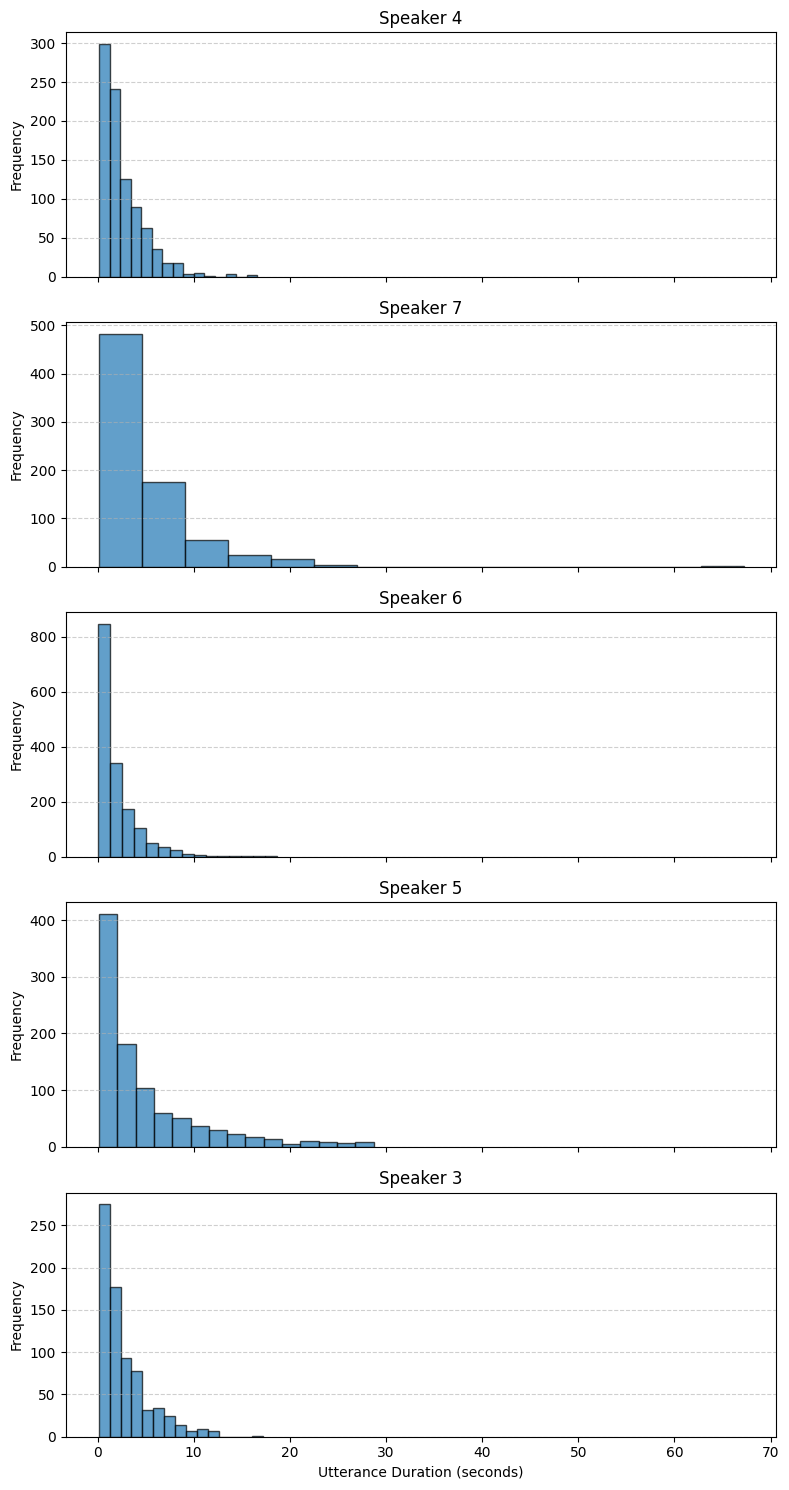

In [21]:
num_speakers = len(speakers)
fig, axs = plt.subplots(num_speakers, 1, figsize=(8, 3 * num_speakers), sharex=True)

for i, (speaker, durations) in enumerate(speakers.items()):
    axs[i].hist(durations, bins=15, alpha=0.7, edgecolor='black')
    axs[i].set_title(f"Speaker {speaker}")
    axs[i].set_ylabel("Frequency")
    axs[i].grid(True, axis='y', linestyle='--', alpha=0.6)

axs[-1].set_xlabel("Utterance Duration (seconds)")
plt.tight_layout()
plt.show()


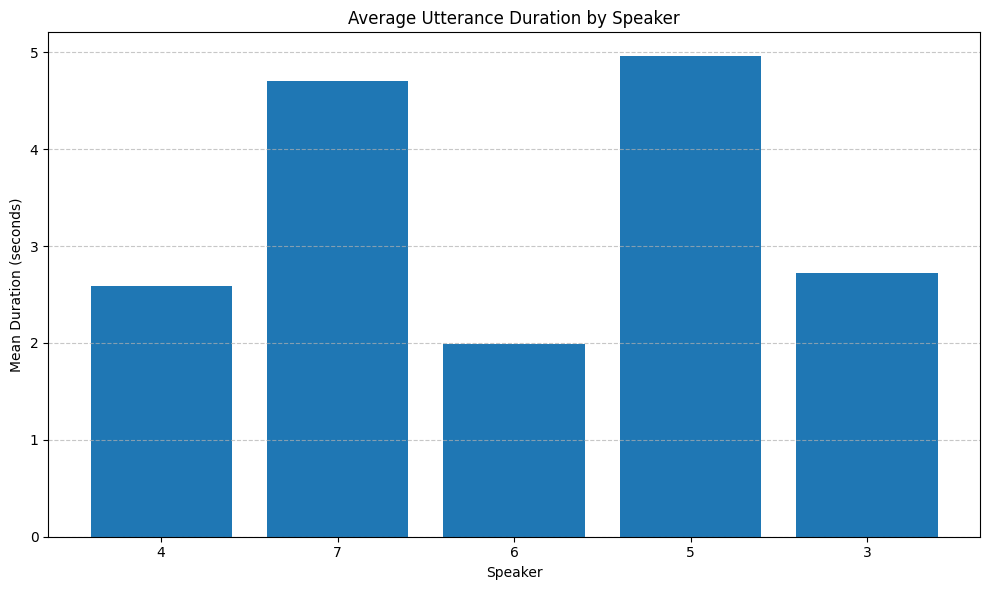

In [22]:
means = [avg[k] for k in speakers]
labels = list(speakers.keys())

plt.figure(figsize=(10, 6))
plt.bar(labels, means)
plt.title("Average Utterance Duration by Speaker")
plt.xlabel("Speaker")
plt.ylabel("Mean Duration (seconds)")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [38]:
import json

speakers = {}

for file in JSON_PATH.glob("*.json"):
    parts = file.stem.split("_")
    speaker = parts[1]

    if not speaker in speakers:
        speakers[speaker] = {}

    with open(file) as f:
        data = json.load(f)
    
    for seg in data:
        topic = data[seg]["high_level"]["current_topic"]
        if not topic in speakers[speaker]:
            speakers[speaker][topic] = []
        start = data[seg]["general"]["start"]
        end = data[seg]["general"]["end"]
        dur = end - start
        speakers[speaker][topic].append(dur)

with open("/tmp/speaker_topic.json", "w") as outf:
    json.dump(speakers, outf)

In [39]:
topic = set()
for spk in speakers:
    topic.update(set(speakers[spk].keys()))

In [40]:
topic

{'ArmChairMesh',
 'ArmChair_3ba6dec5',
 'ArmChair_3e286e7a',
 'ArmChair_66a02cd7',
 'BlackVase_61b7da0b',
 'Blanket',
 'BookCase_a34d9887',
 'Book_17',
 'Book_28',
 'Book_7e290dff',
 'Box_7d6b3e2c',
 'Box_acb44c64',
 'Box_c423d56d_2',
 'CeilingLight',
 'CeilingLights',
 'CellPhone_673ecda8',
 'Chair_204_2',
 'Chair_9f65dae8',
 'Chair_c6d435d0',
 'Chair_c6d435d0s',
 'Chandelier',
 'CoffeeSideTable_ecd457feTable_55f895de',
 'CoffeeTable_0f0649ce',
 'CoffeeTable_55f895de',
 'CoffeeTable_dd16dc6e',
 'CreditCard_1f5b07d9',
 'CreditCard_5794fee0',
 'CreditCard_6b898bfd',
 'CreditCard_c655b727',
 'DeskLamp_3d0b0fb7',
 'Desk_204_1',
 'DiningTable_2401ee04',
 'DiningTable_d80cf940',
 'DogBed_d4afafd0',
 'Dog_Statue_1',
 'Door',
 'Drawers',
 'Dresser_05cb66e0',
 'Dresser_29dd319f',
 'Dresser_ff109676',
 'FertilityStatue_dcd19fe9',
 'Fertility_Statue_Shards_1',
 'FirePlace',
 'Fireplace',
 'Floor',
 'FloorLamp_014221fc',
 'FloorLamp_0211624d',
 'FloorLamp_4062327b',
 'FloorLamp_75348c2c',
 'Floor

In [48]:
def build_prompt(utterance):
    return (
        "An image is (X, Y)=(640, 400).\n"
        "Locate the object commonly referred to as '{0}' in the image.\n"
        "Focus on its visual appearance and spatial layout.\n"
        "Return only the coordinates as [[x1, y1, x2, y2]].\n"
        "Example: [[100, 150, 300, 400]]"
    ).format(utterance)
build_prompt("Sofa")

"An image is (X, Y)=(640, 400).\nLocate the object commonly referred to as 'Sofa' in the image.\nFocus on its visual appearance and spatial layout.\nReturn only the coordinates as [[x1, y1, x2, y2]].\nExample: [[100, 150, 300, 400]]"